In [11]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime, timedelta

sys.path.append('..')
import config

In [12]:
data_dir = config.RAW_DATA_PATH
print()
print(f'Data dir: {data_dir}')
print()

data_files = glob.glob(data_dir + '/2023*.csv')

for data_file in data_files:
    print(data_file)
    
print()


Data dir: /home/siderealyear/arkk/RhT_monitor/data/raw_data

/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-01.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-02.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-03.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-04.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-05.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-06.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-07.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-08.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-09.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-10.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-11.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-12.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-13.csv
/home/siderealyear/arkk/RhT_monitor/data/raw_data/2023-01-14.csv
/home/siderealyear/arkk/RhT_

In [13]:
data_frames = []

for data_file in data_files:
    data = pd.read_csv(data_file)
    data_frames.append(data)
    
data_df = pd.concat(data_frames)
data_df.reset_index(inplace = True, drop = True)
data_df['Datetime'] = pd.to_datetime(data_df['Datetime'])

In [14]:
data_df.head(5)

,Datetime,MCP9808 temperature (°C),MCP9808 temperature (°F),MS8607 temperature (°C),MS8607 temperature (°F),MS8607 pressure (kPa),MS8607 relative humidity (%)
0,2023-01-01 00:00:46.548563,19.7,67.5,20.2,68.4,100.3,40.3
1,2023-01-01 00:01:08.724535,19.7,67.5,20.2,68.4,100.3,40.3
2,2023-01-01 00:02:09.153176,19.7,67.5,20.2,68.4,100.3,40.3
3,2023-01-01 00:03:08.685813,19.7,67.5,20.2,68.4,100.3,40.3
4,2023-01-01 00:04:09.162494,19.8,67.6,20.2,68.4,100.3,40.3


In [15]:
data_df.tail(5)

,Datetime,MCP9808 temperature (°C),MCP9808 temperature (°F),MS8607 temperature (°C),MS8607 temperature (°F),MS8607 pressure (kPa),MS8607 relative humidity (%)
60785,2023-04-06 13:44:08.464484,20.6,69.1,20.8,69.4,101.6,42.3
60786,2023-04-06 13:45:09.189719,20.5,68.9,20.8,69.4,101.6,42.3
60787,2023-04-06 13:46:08.897052,20.6,69.1,20.9,69.6,101.6,42.3
60788,2023-04-06 13:47:08.609006,20.6,69.1,20.9,69.6,101.6,42.3
60789,2023-04-06 13:48:08.367662,20.6,69.1,20.9,69.6,101.6,42.4


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60790 entries, 0 to 60789
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Datetime                      60790 non-null  datetime64[ns]
 1   MCP9808 temperature (°C)      60790 non-null  float64       
 2   MCP9808 temperature (°F)      60790 non-null  float64       
 3   MS8607 temperature (°C)       60790 non-null  float64       
 4   MS8607 temperature (°F)       60790 non-null  float64       
 5   MS8607 pressure (kPa)         60790 non-null  float64       
 6   MS8607 relative humidity (%)  60790 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.2 MB


In [17]:
# Filter out spurious (-800 °F)
data_df = data_df[data_df['MS8607 temperature (°F)'] > 0]

In [18]:
# Set plot date range
plot_start = pd.to_datetime('2023-04-01')
plot_end = pd.to_datetime('2023-04-05')

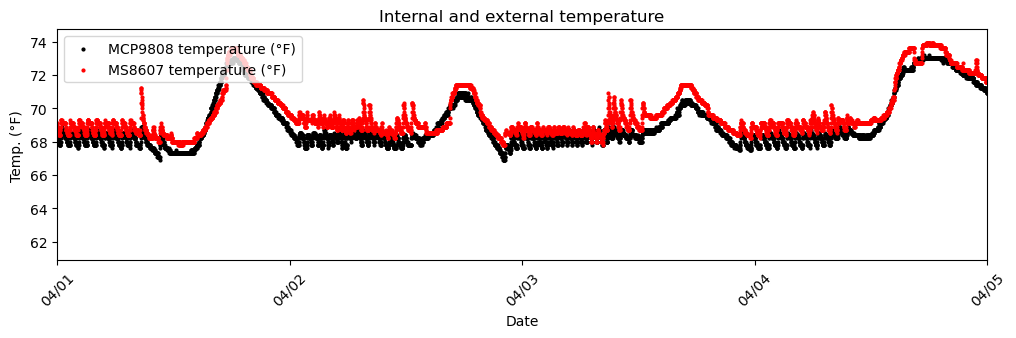

In [19]:
fig = plt.gcf()
fig.set_size_inches(12, 3)

plt.scatter(
    data_df['Datetime'],
    data_df['MCP9808 temperature (°F)'],
    s = 4,
    color = 'black',
    label = 'MCP9808 temperature (°F)'
)

plt.scatter(
    data_df['Datetime'],
    data_df['MS8607 temperature (°F)'],
    s = 4,
    color = 'red',
    label = 'MS8607 temperature (°F)'
)

plt.legend(loc="upper left")

plt.gca().xaxis.set_major_locator(dates.HourLocator(interval = 24))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
plt.ticklabel_format(axis = 'y', useOffset = False, style = 'plain')
plt.title('Internal and external temperature')
plt.xlabel('Date')
plt.ylabel('Temp. (°F)')
plt.xlim(plot_start, plot_end)

plt.xticks(rotation = 45)

plt.show()

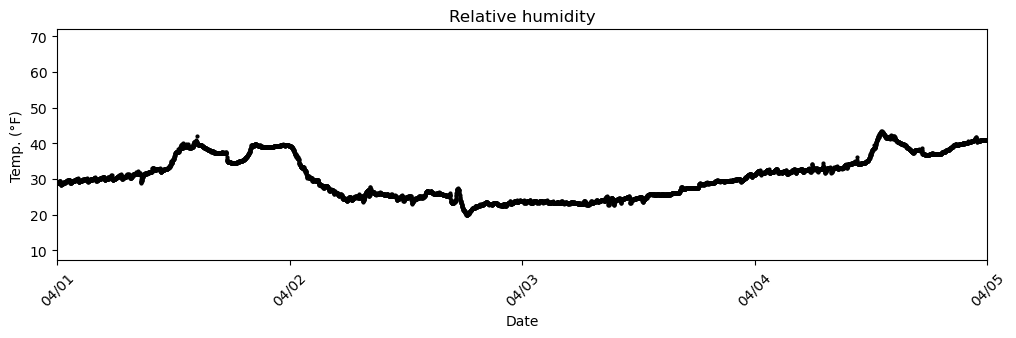

In [20]:
fig = plt.gcf()
fig.set_size_inches(12, 3)

plt.scatter(
    data_df['Datetime'],
    data_df['MS8607 relative humidity (%)'],
    s = 4,
    color = 'black'
)

plt.gca().xaxis.set_major_locator(dates.HourLocator(interval = 24))
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))
plt.ticklabel_format(axis = 'y', useOffset = False, style = 'plain')
plt.title('Relative humidity')
plt.xlabel('Date')
plt.ylabel('Temp. (°F)')
plt.xlim(plot_start, plot_end)

plt.xticks(rotation = 45)

plt.show()